In [1]:
import pandas as pd

from Models.Pairs.Feature_engineering.dependences import DependenciesPlots
from Models.Pairs.Feature_engineering.model_explainer import ExplainModel
from Models.Pairs.Hyperparameters.optuna_hyperparameters import OptunaXgboost
from Models.Pairs.pairs_xgboost_model import TrainXgBoost
from Models.variables import PAIRS_DATASET


def create_model(data, hyperparameters=False):
    created_model = TrainXgBoost(data, test_range=[2024], hyperparameters=hyperparameters, prints=True, plots=False, details=False)
    created_model.create_classification_model()
    created_model.evaluate_classification()

    return created_model

def run_optuna(data, number_of_runs=5):
    results = list()
    for i in range(number_of_runs):
        hyper = OptunaXgboost(data, prints=False, accuracy_threshold=0.709)

        results.append([i + 1, hyper, hyper.pairs, hyper.accuracy, hyper.accuracy_with_bonuses, hyper.optuna_results])
        print(results[-1][:-1])

    df = pd.DataFrame(data=results, columns=['Run', 'Model', 'Pairs_accuracy', 'Accuracy', 'Accuracy_with_bonuses', 'Optuna_results'])
    df = df.sort_values(by=['Accuracy_with_bonuses'], ascending=False).reset_index(drop=True)

    df = df.loc[0,:]
    print(df['Accuracy_with_bonuses'])

    return df


def amended_dataset_test(data, tested_features, optuna_runs):
    create_model(data)
    tuned_model = run_optuna(data, optuna_runs)
    dependence_plots = DependenciesPlots(trained_model=tuned_model['Model'], features_to_plot=tested_features)

    for dp in dependence_plots.dependencies_plots:
        dp.show()

    model_explainer = ExplainModel(tuned_model['Model'])
    model_explainer.importances_heatmap.show()
    # model_explainer.correlation_heatmap.show()
    model_explainer.permutation_importance.show()

Elapsed time: 1.08s
Classification accuracy (plain pairs): 68.648% (8014/11674)
Classification accuracy (summed pairs): 42.268% (1692/4003)
Classification accuracy: 42.843% (1715/4003)
Classification accuracy (with bonuses): 47.339% (1895/4003)


[I 2025-05-23 15:54:40,875] A new study created in memory with name: no-name-2f40162a-6cf4-454b-8b8e-a200b5d0192d


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8C20B3230>, 0.7099537433613158, 0.44441668748438673, 0.4898825880589558]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8C1E00230>, 0.7081548740791502, 0.44441668748438673, 0.4923807144641519]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8C201B470>, 0.7102107246873394, 0.44591556332750437, 0.4898825880589558]
0.4923807144641519
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_2220\485750924.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_2220\485750924.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


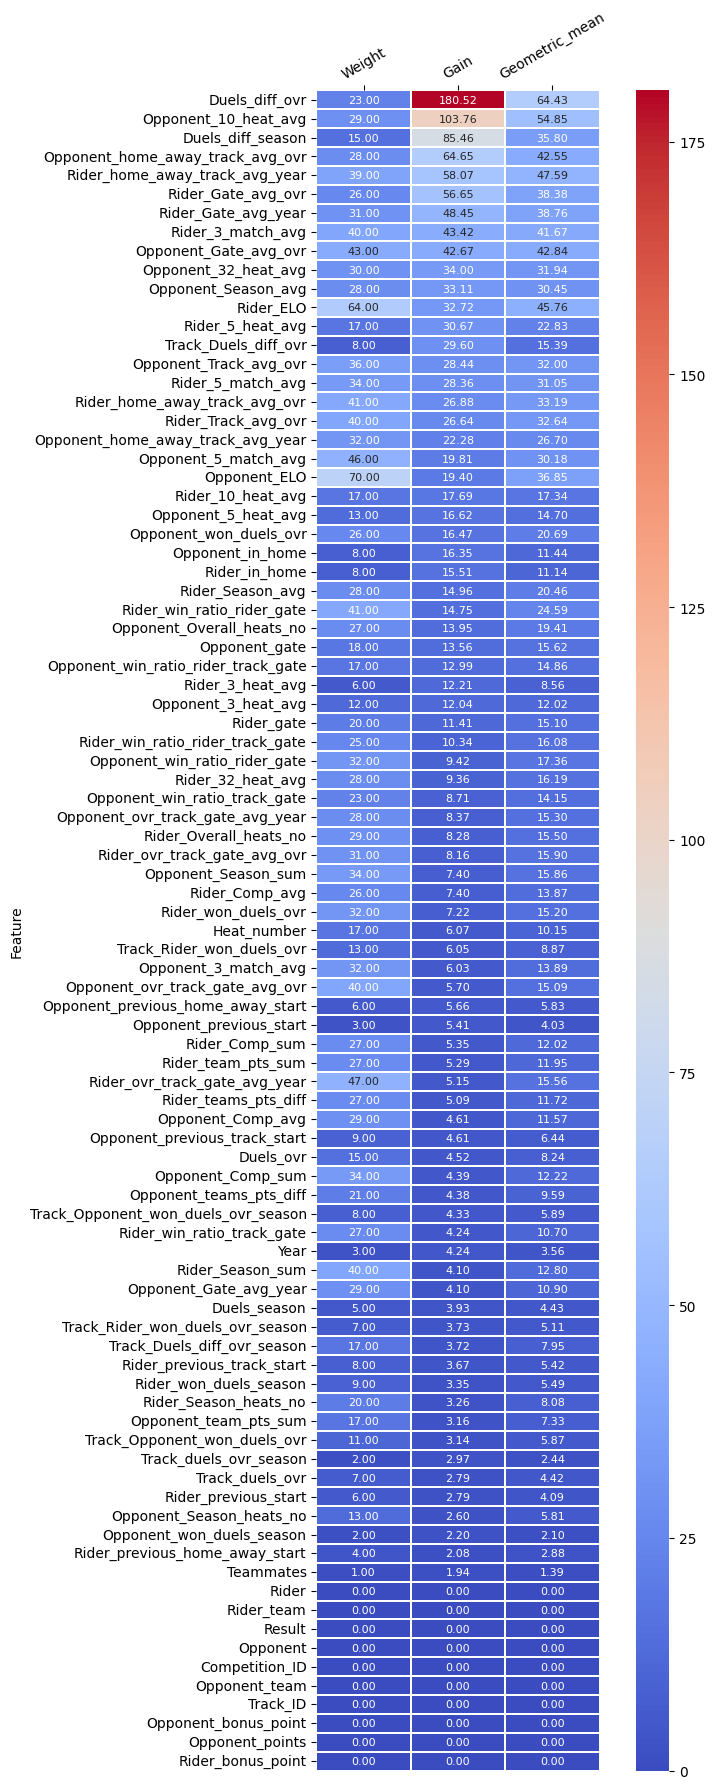

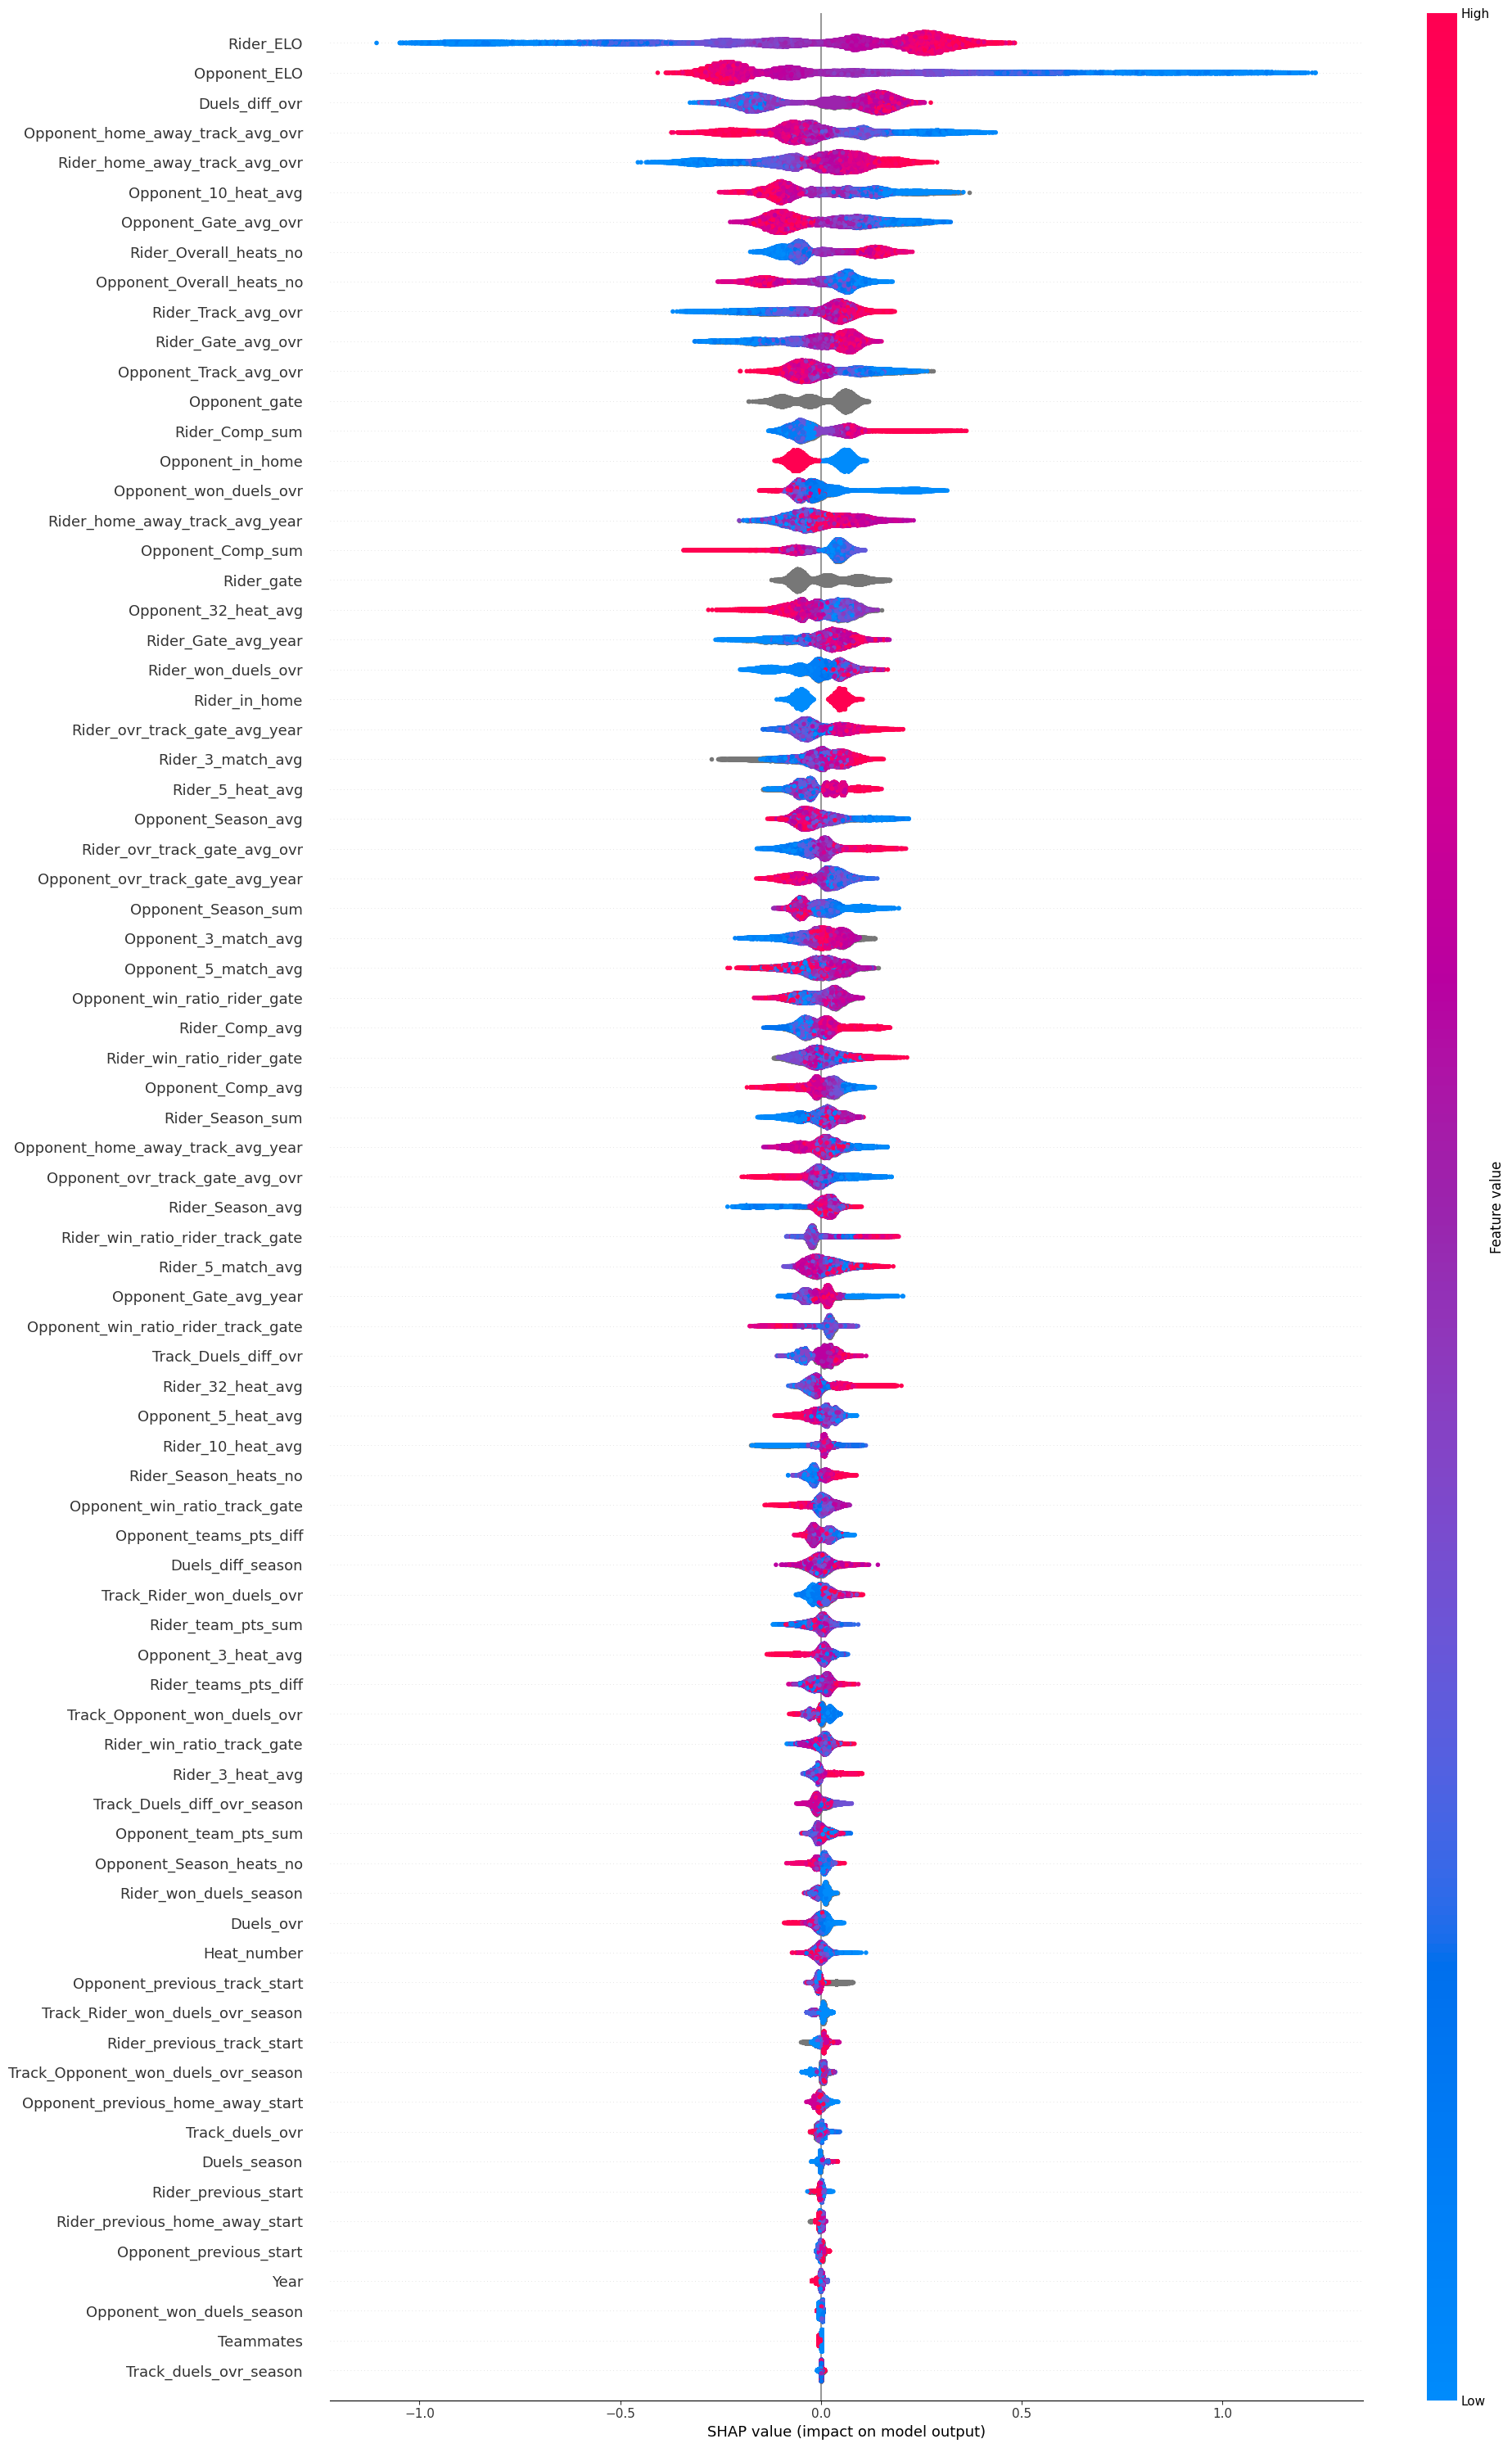

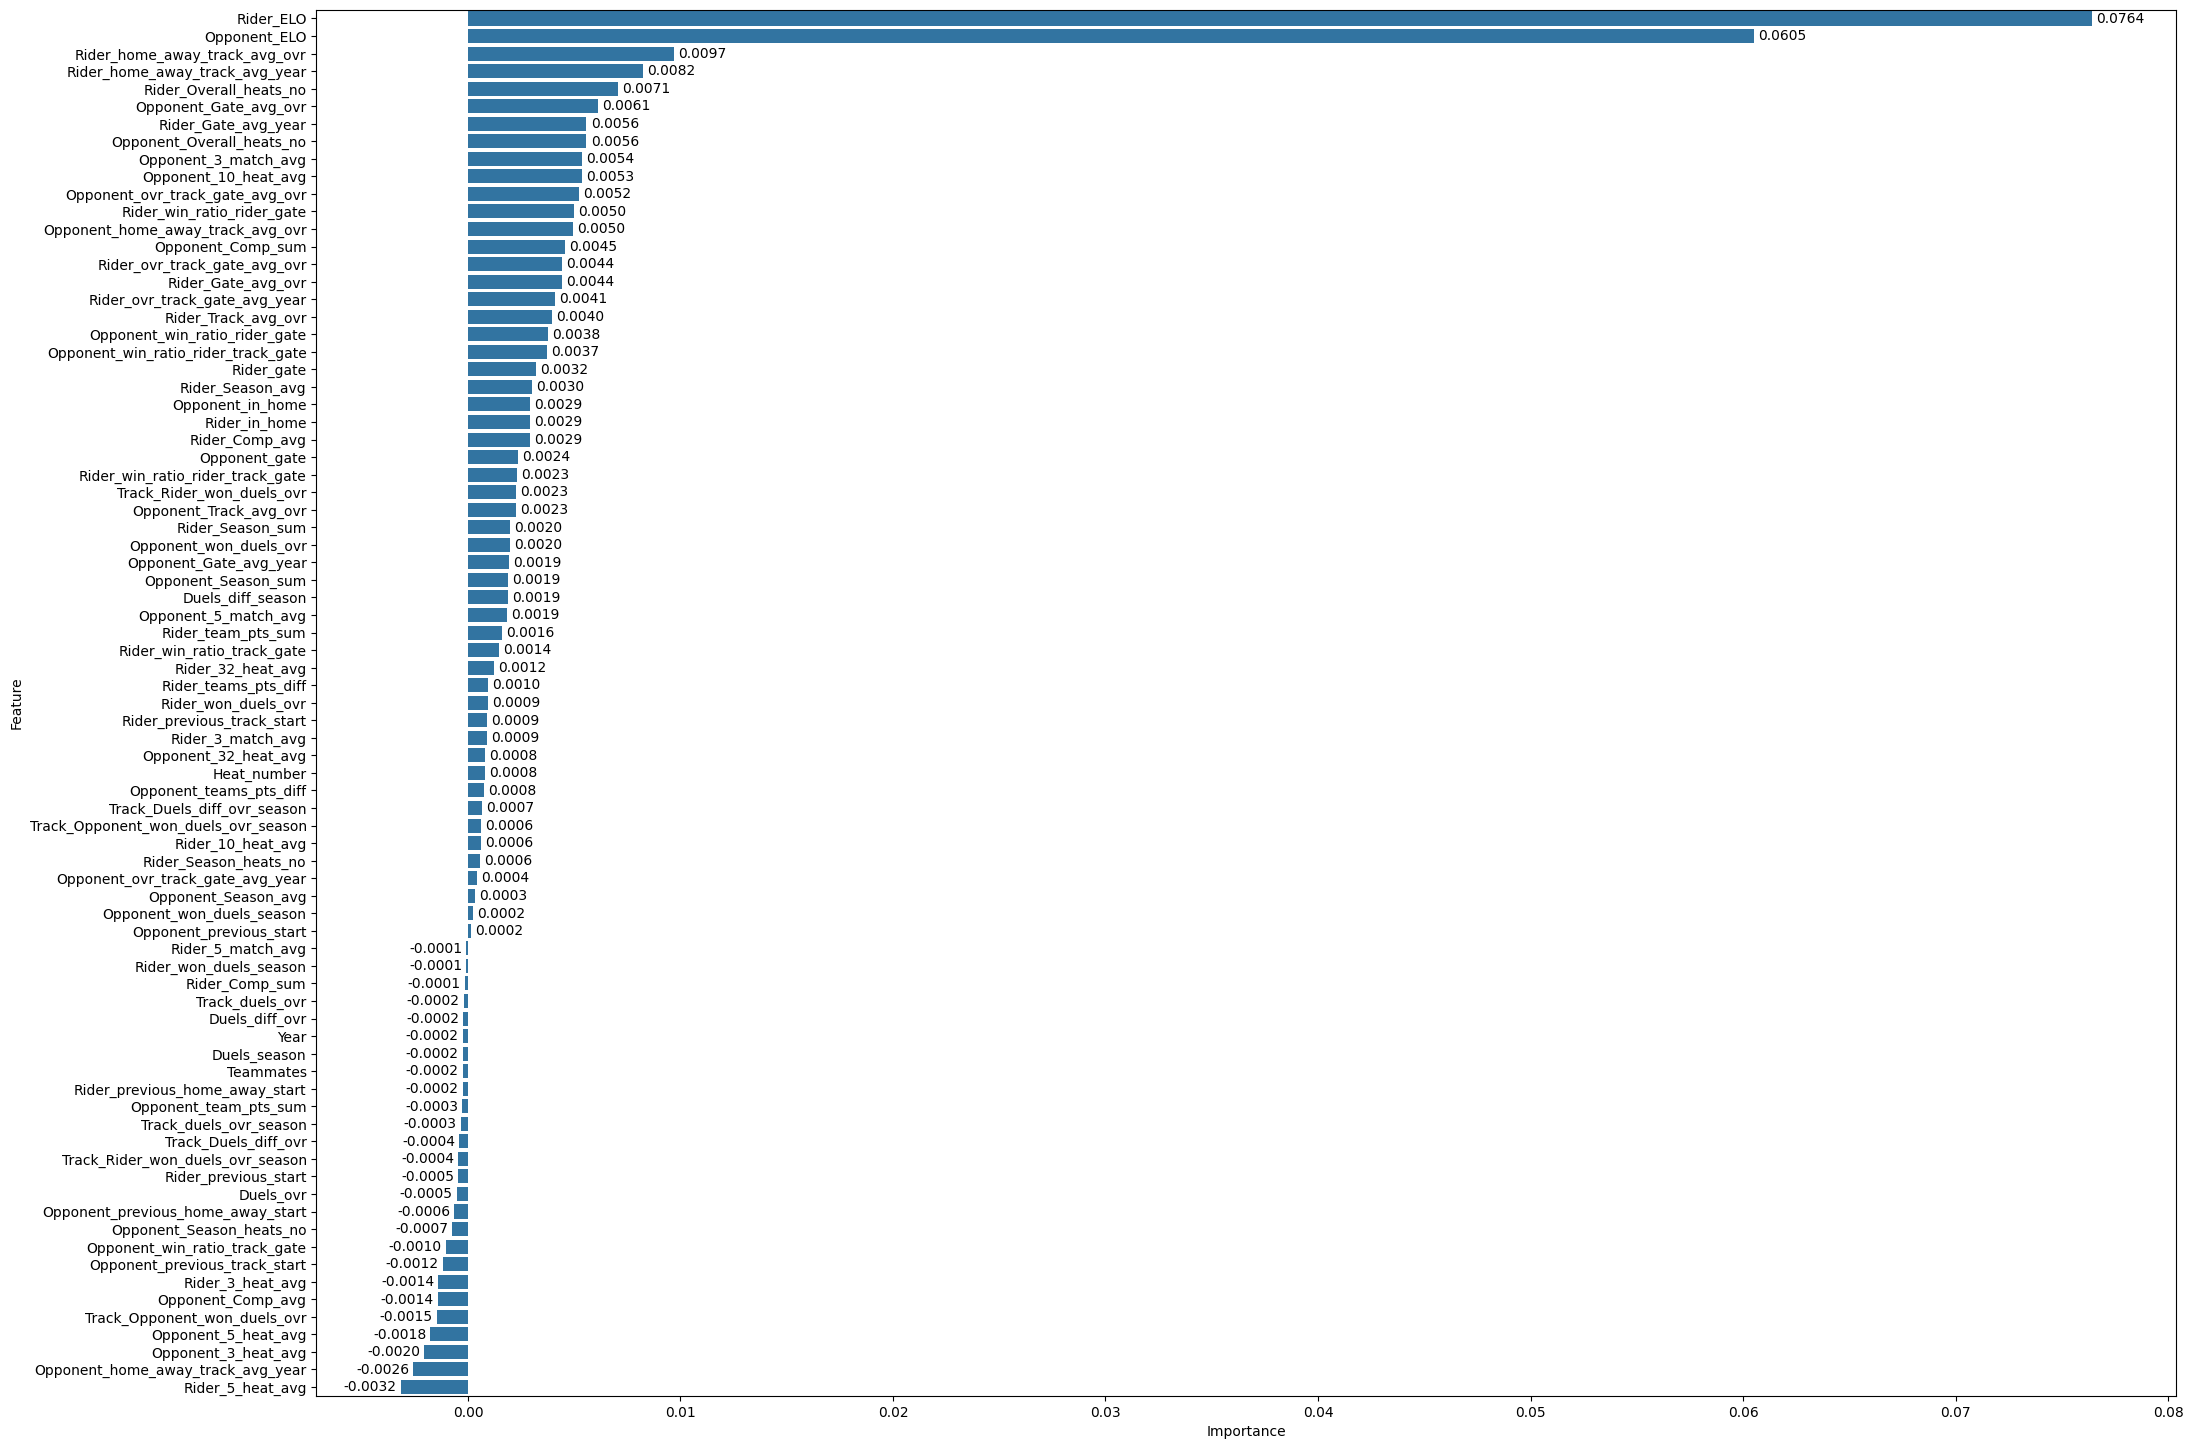

In [2]:
dataset = pd.read_parquet(f"../../../Dataset/Datasets/{PAIRS_DATASET}")
amended_dataset_test(dataset, [], 3)

Elapsed time: 1.07s
Classification accuracy (plain pairs): 68.511% (7998/11674)
Classification accuracy (summed pairs): 42.018% (1682/4003)
Classification accuracy: 43.318% (1734/4003)
Classification accuracy (with bonuses): 47.814% (1914/4003)


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8BF9214F0>, 0.7066129861230084, 0.4439170622033475, 0.485885585810642]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8C1FA2930>, 0.7063560047969848, 0.4394204346739945, 0.48638521109168126]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000001D8C1F1ACC0>, 0.7060990234709611, 0.43567324506620037, 0.4806395203597302]
0.48638521109168126
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_2220\485750924.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_2220\485750924.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


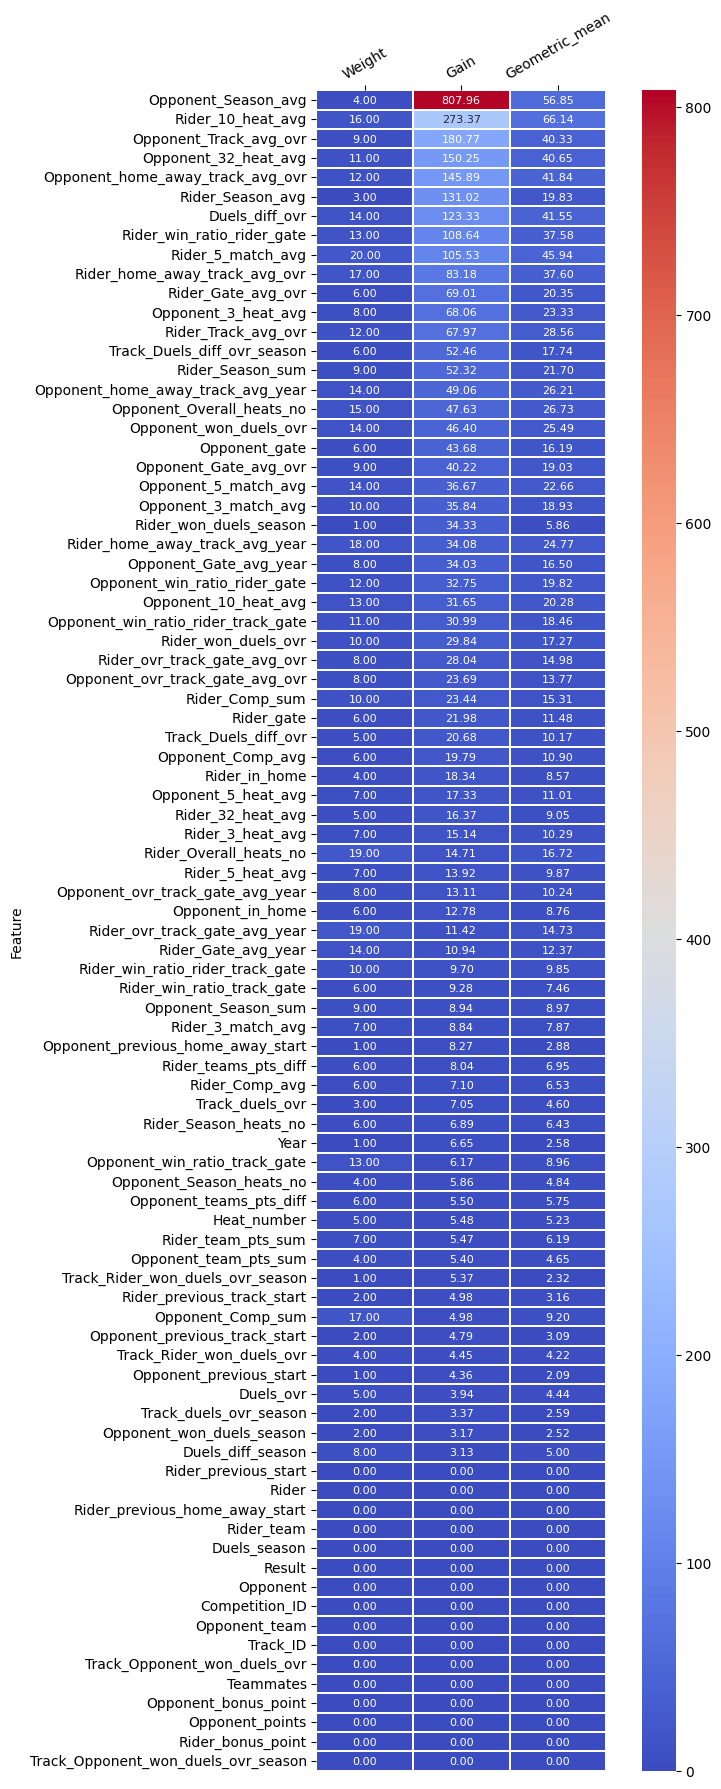

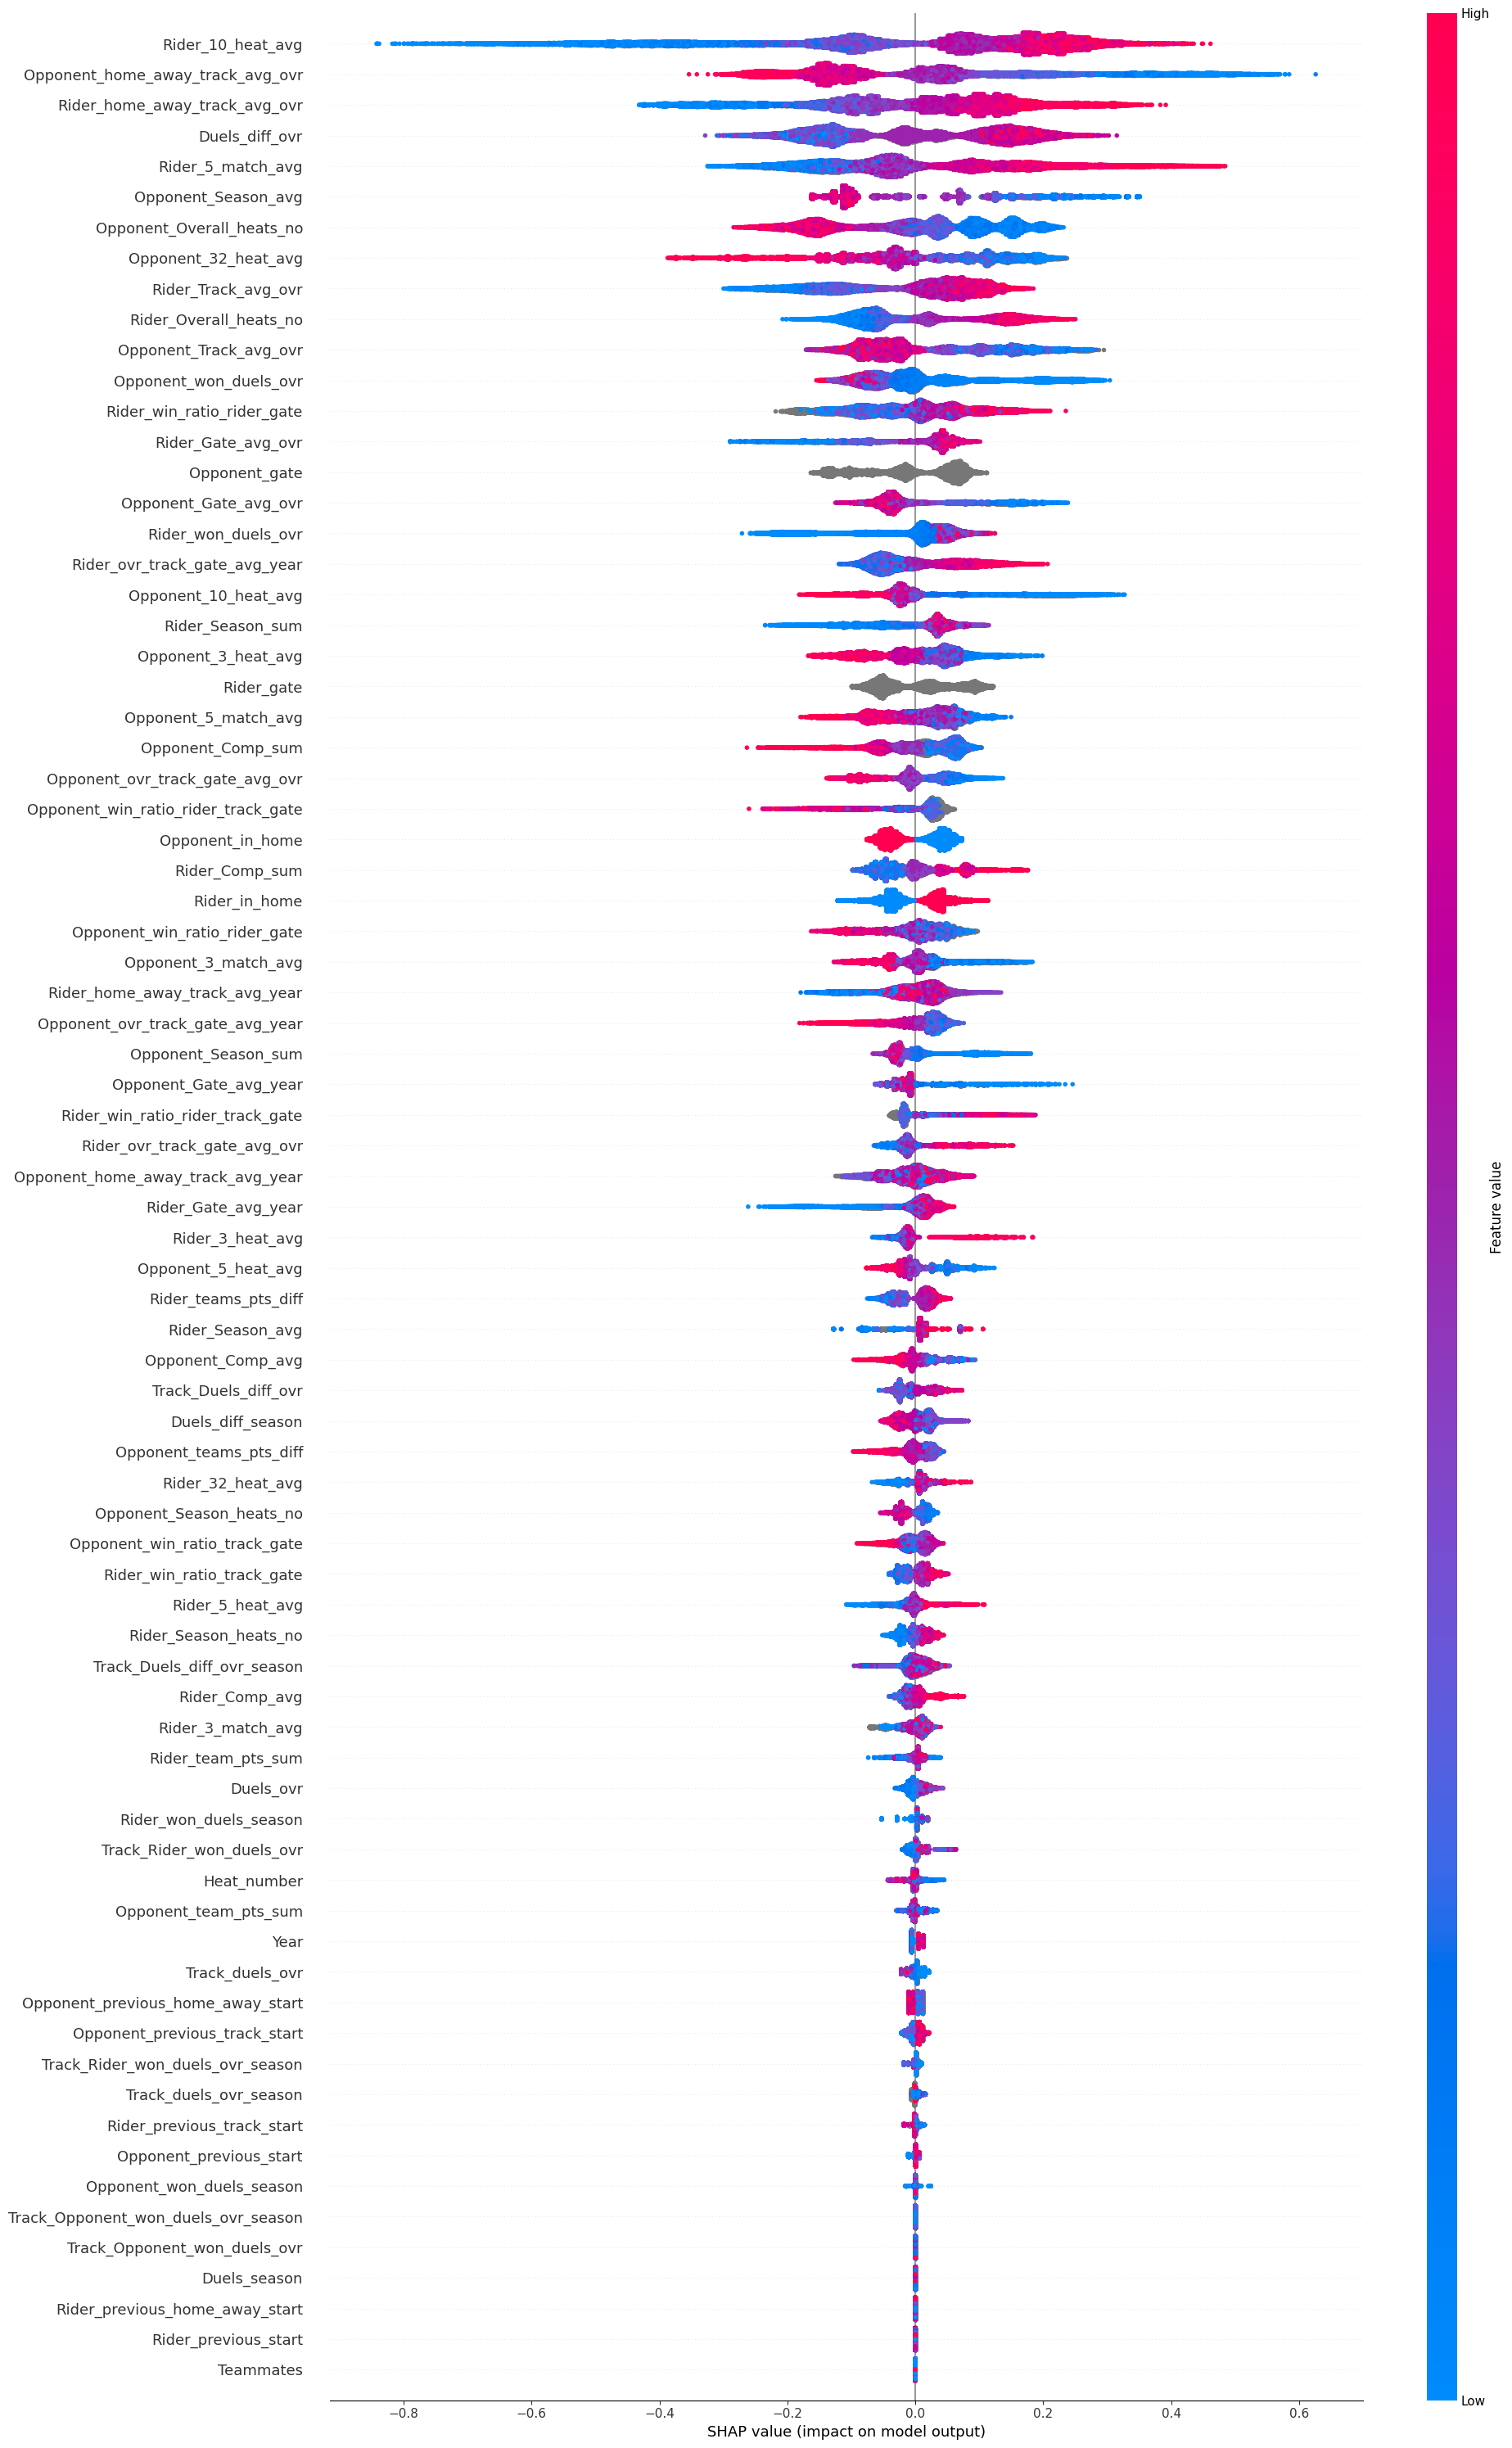

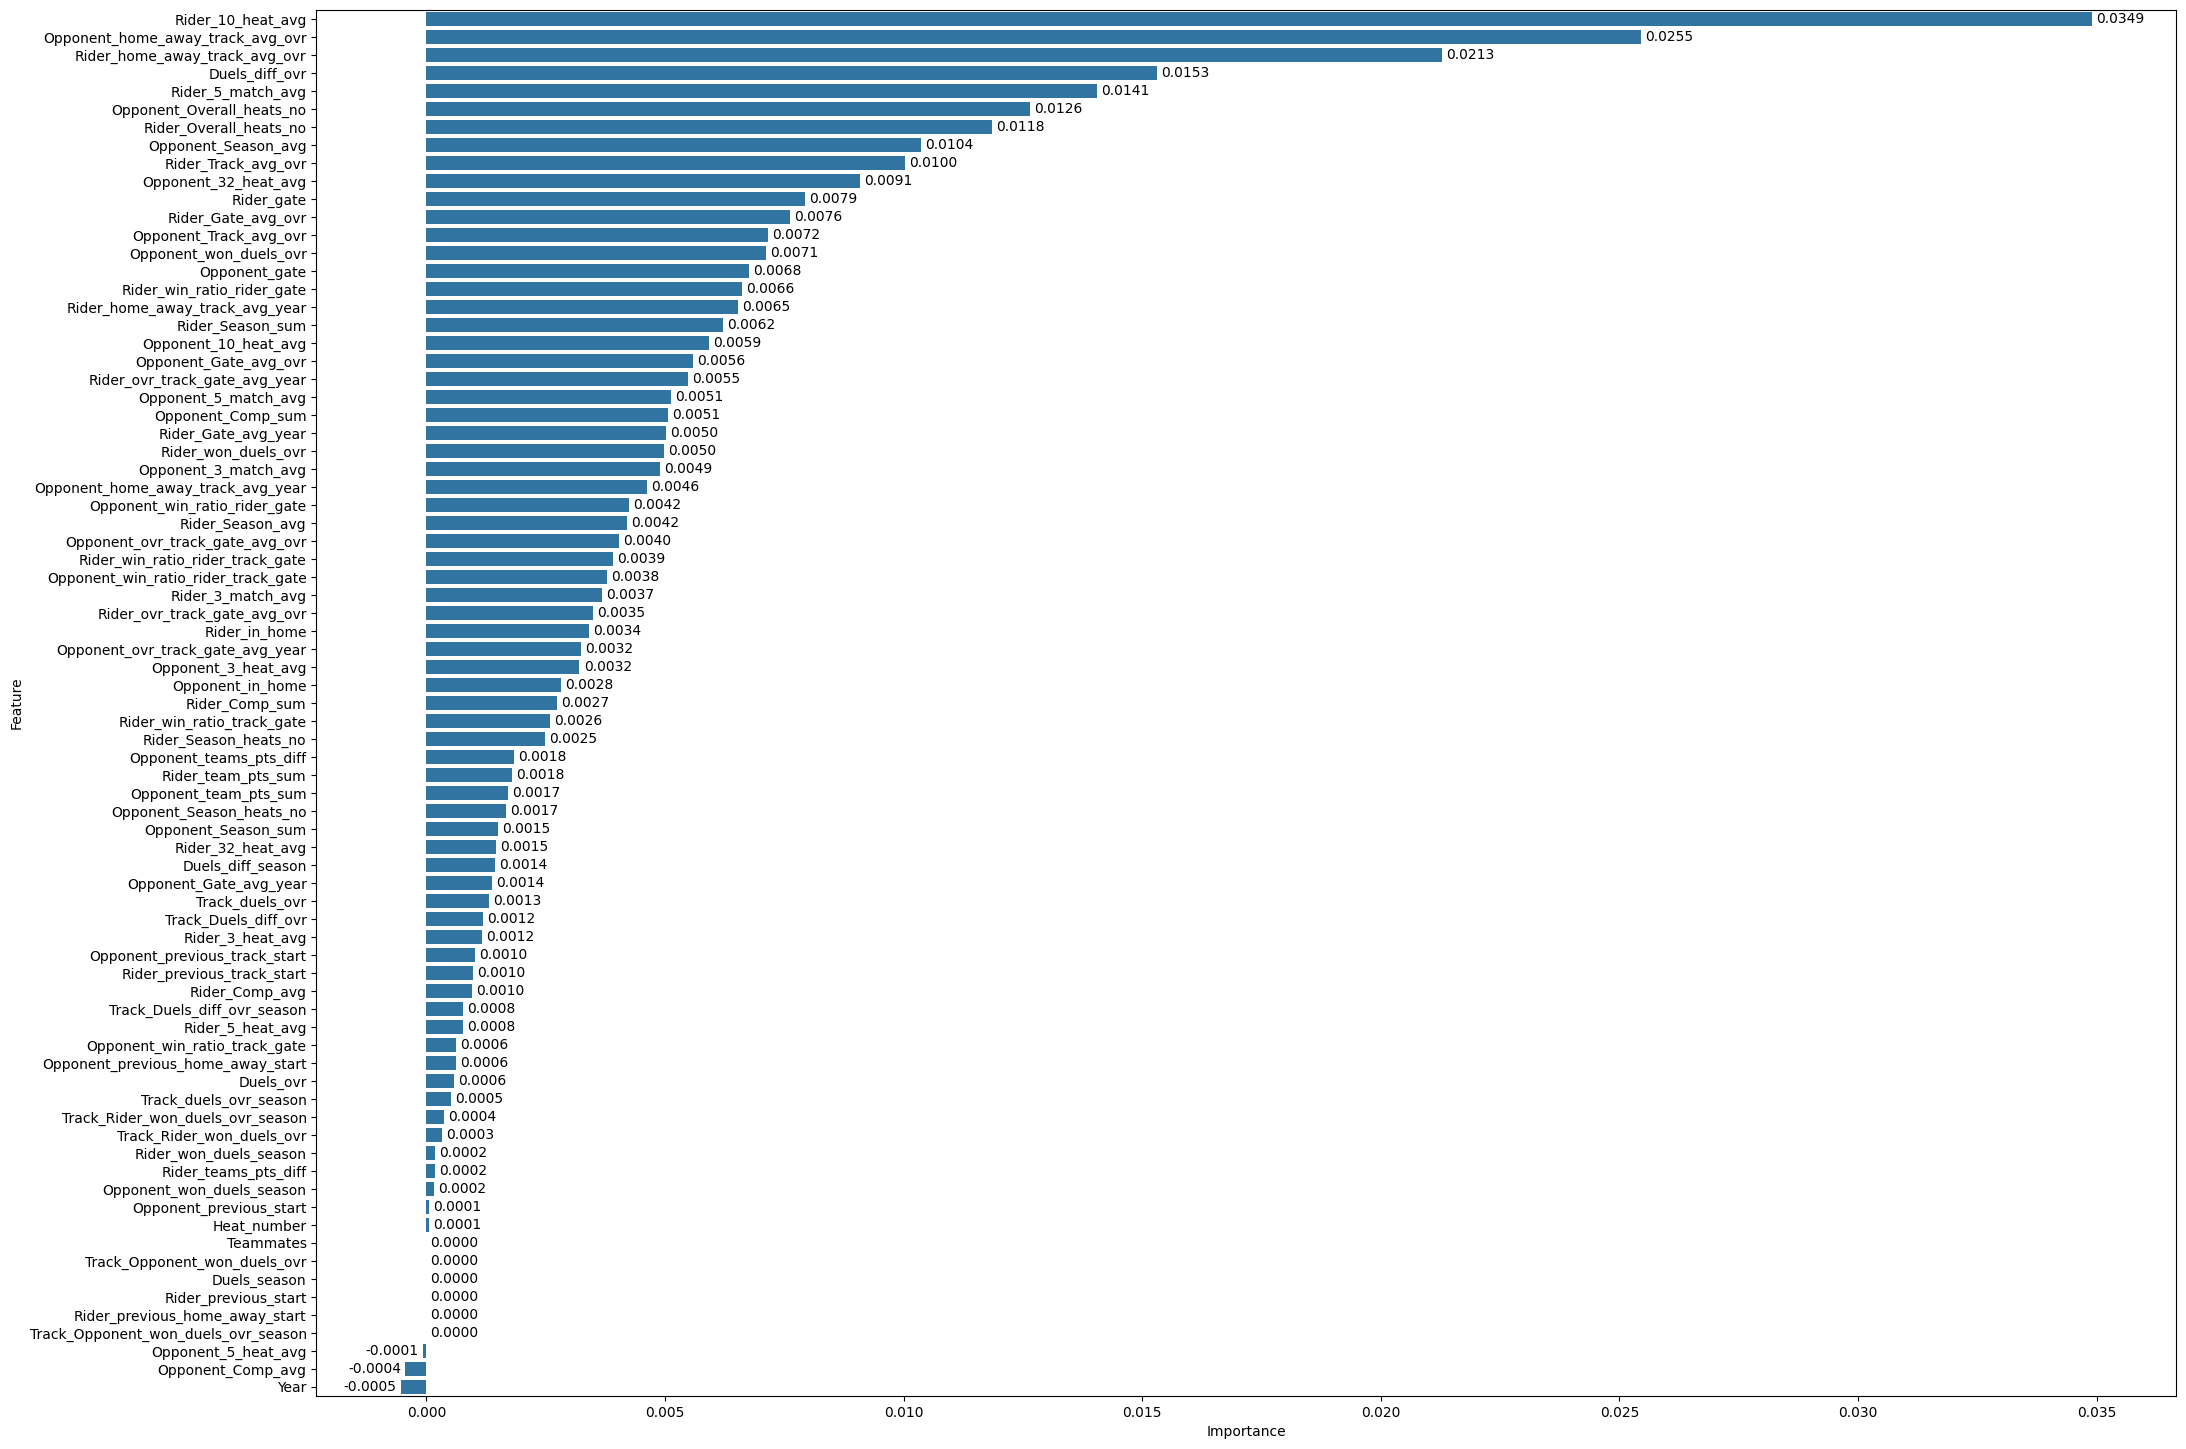

In [3]:
# dataset['3_heat_avg_diff'] = dataset['Rider_3_heat_avg'] - dataset['Opponent_3_heat_avg']
features = []  # ['3_heat_avg_diff', 'Rider_3_heat_avg', 'Opponent_3_heat_avg']
dataset.drop(['Rider_ELO', 'Opponent_ELO'], axis=1, inplace=True)
amended_dataset_test(dataset, features, 3)